# Data Analysis

In [1]:
# See https://github.com/ultralytics/ultralytics/issues/1270 
!pip install opencv-python-headless

In [2]:
import os
import json
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Data analysis original data
The description can be found [here](https://dentex.grand-challenge.org/data/).

In [43]:
path_qd = "./dentex_dataset/origin/quadrant_enumeration_disease"
os.listdir(path_qd)

['xrays', 'train_quadrant_enumeration_disease.json', '.ipynb_checkpoints']

In [44]:
with open("./dentex_dataset/origin/quadrant_enumeration_disease/train_quadrant_enumeration_disease.json", "r") as json_file:
    json_content = json.load(json_file)
    images = pd.DataFrame(json_content["images"]).set_index("id")
    annotations = pd.DataFrame(json_content["annotations"]).set_index("id")
    quadrant = pd.DataFrame(json_content["categories_1"]).set_index("id")
    tooth_number = pd.DataFrame(json_content["categories_2"]).set_index("id")
    disease = pd.DataFrame(json_content["categories_3"]).set_index("id")

In [45]:
images

,height,width,file_name
id,,,
1,1316,2744,train_673.png
2,1504,2872,train_283.png
3,1316,2909,train_435.png
4,1504,2872,train_95.png
5,1504,2872,train_475.png
...,...,...,...
701,1316,2910,train_338.png
702,1316,2851,train_657.png
703,1316,2850,train_344.png


In [46]:
annotations

,iscrowd,image_id,bbox,segmentation,area,category_id_1,category_id_2,category_id_3
id,,,,,,,,
1,0,1,"[542.0, 698.0, 220.0, 271.0]","[[621, 703, 573, 744, 542, 885, 580, 945, 650,...",39683,3,7,0
2,0,1,"[1952.0, 693.0, 177.0, 270.0]","[[2045, 693, 2109, 734, 2129, 915, 2047, 963, ...",33301,2,7,0
3,0,1,"[675.0, 708.0, 243.0, 300.0]","[[784, 711, 754, 746, 737, 821, 678, 916, 675,...",45758,3,6,1
4,0,1,"[1463.0, 725.0, 98.0, 425.0]","[[1464, 749, 1513, 725, 1550, 760, 1555, 798, ...",30985,2,2,1
5,0,1,"[1536.0, 753.0, 103.0, 381.0]","[[1543, 796, 1590, 753, 1622, 796, 1629, 840, ...",28044,2,3,1
...,...,...,...,...,...,...,...,...
3525,0,705,"[1851.2857142857142, 474.2857142857142, 117.14...","[[1885, 477, 1868, 597, 1859, 657, 1851, 728, ...",28938,1,5,1
3526,0,705,"[1959.0, 479.9999999999999, 127.0, 274.2857142...","[[2005, 488, 1974, 479, 1965, 522, 1965, 588, ...",23181,1,6,1
3527,0,705,"[2024.9999999999998, 463.0, 147.00000000000023...","[[2064, 463, 2024, 471, 2036, 559, 2056, 628, ...",20023,1,7,3


In [47]:
# Check for missing values
missing_values = annotations.isna().sum()
print(missing_values)

iscrowd          0
image_id         0
bbox             0
segmentation     0
area             0
category_id_1    0
category_id_2    0
category_id_3    0
dtype: int64


In [48]:
quadrant

,name,supercategory
id,,
0,1,1
1,2,2
2,3,3
3,4,4


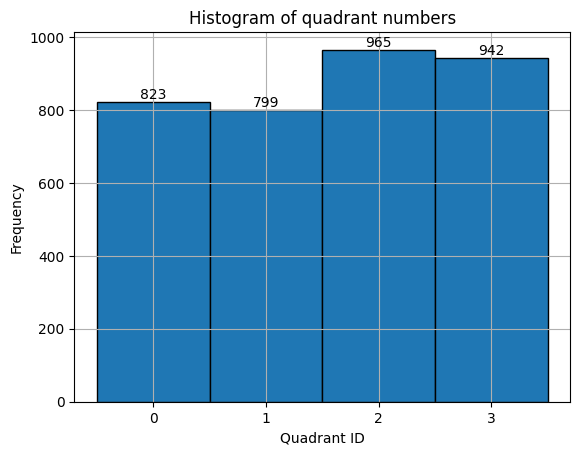

In [72]:
# Filter out non-integer values and drop NaNs
whole_numbers = annotations['category_id_1'].astype(int)

# Determine the range for the histogram
data_min = whole_numbers.min() 
data_max = whole_numbers.max()

# Plot histogram
plt.hist(whole_numbers, bins=np.arange(data_min-0.5, data_max+1.5), edgecolor='black') 

# Display counts on top of each bar
counts = whole_numbers.value_counts() 
for i in range(data_min, data_max + 1): 
    plt.text(i, counts.get(i, 0), str(counts.get(i, 0)), ha='center', va='bottom')

plt.title('Histogram of quadrant numbers') 
plt.xlabel('Quadrant ID') 
plt.ylabel('Frequency') 
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

In [49]:
tooth_number

,name,supercategory
id,,
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8


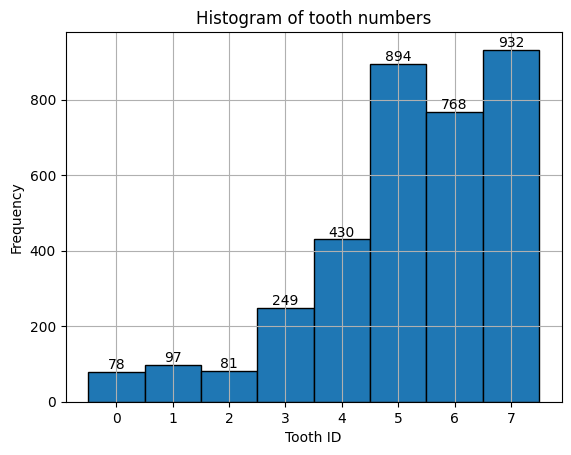

In [69]:
# Filter out non-integer values and drop NaNs
whole_numbers = annotations['category_id_2'].astype(int)

# Determine the range for the histogram
data_min = whole_numbers.min() 
data_max = whole_numbers.max()

# Plot histogram
plt.hist(whole_numbers, bins=np.arange(data_min-0.5, data_max+1.5), edgecolor='black') 

# Display counts on top of each bar
counts = whole_numbers.value_counts() 
for i in range(data_min, data_max + 1): 
    plt.text(i, counts.get(i, 0), str(counts.get(i, 0)), ha='center', va='bottom')

plt.title('Histogram of tooth numbers') 
plt.xlabel('Tooth ID') 
plt.ylabel('Frequency') 
plt.grid(True) 
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

In [50]:
disease

,name,supercategory
id,,
0,Impacted,Impacted
1,Caries,Caries
2,Periapical Lesion,Periapical Lesion
3,Deep Caries,Deep Caries


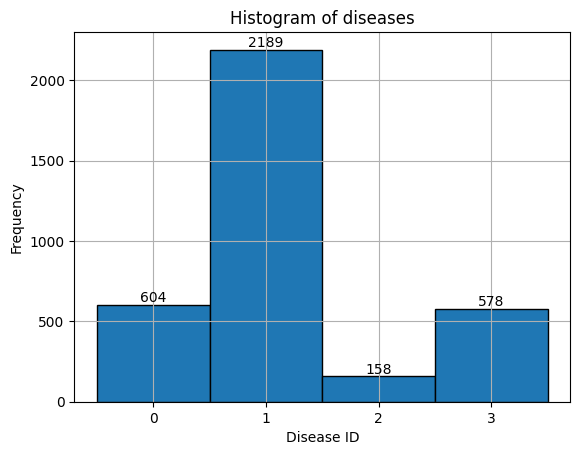

In [67]:
# Filter out non-integer values and drop NaNs
whole_numbers = annotations['category_id_3'].astype(int)

# Determine the range for the histogram
data_min = whole_numbers.min() 
data_max = whole_numbers.max()

# Plot histogram
plt.hist(whole_numbers, bins=np.arange(data_min-0.5, data_max+1.5), edgecolor='black') 

# Display counts on top of each bar
counts = whole_numbers.value_counts() 
for i in range(data_min, data_max + 1): 
    plt.text(i, counts.get(i, 0), str(counts.get(i, 0)), ha='center', va='bottom')

plt.title('Histogram of diseases') 
plt.xlabel('Disease ID') 
plt.ylabel('Frequency') 
plt.grid(True) 

# Use MaxNLocator to ensure only whole numbers are used on the x-axis
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

### Facit
The dataset was created by 3 expert dentists and is of very high quality. It contains no null values. <br>
While diseases occur in all quadrants similarily there is a pattern that the teeth more close to the edges are more often affected by diseases. <br>
Of the classified diseases, caries occur most by far. It occurs ~14x more than the least occuring class (Periapical Lesion)

## First Example

Look into the first example in detail

In [10]:
images[:1]

,height,width,file_name
id,,,
1,1316,2744,train_673.png


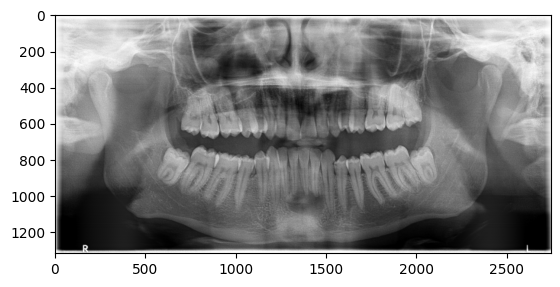

In [11]:
image_path = './dentex_dataset/origin/quadrant_enumeration_disease/xrays/train_673.png'
image = cv2.imread(image_path)
plt.imshow(image)

In [12]:
annotation = annotations[:1]
annotation

,iscrowd,image_id,bbox,segmentation,area,category_id_1,category_id_2,category_id_3
id,,,,,,,,
1,0,1,"[542.0, 698.0, 220.0, 271.0]","[[621, 703, 573, 744, 542, 885, 580, 945, 650,...",39683,3,7,0


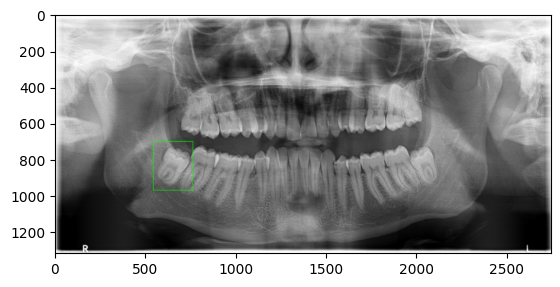

In [27]:
image_path = './dentex_dataset/origin/quadrant_enumeration_disease/xrays/train_673.png'
image = cv2.imread(image_path)

# Unpack bounding box coordinates
bbox = annotations["bbox"][1]

# Extract coordinates
x_min = int(bbox[0])
y_min = int(bbox[1])
width = int(bbox[2])
height = int(bbox[3])

# Convert to OpenCV bounding box format
cv2_bbox = (x_min, y_min, width, height)
# Draw bounding box
cv2.rectangle(image, cv2_bbox, (0, 255, 0), 2)  # Green rectangle with thickness 2

plt.imshow(image)

This tooth, quadrant: 4, number: 8 is impacted 

In [28]:
segmentation_mask = annotations["segmentation"][1]
segmentation_mask

[[621,
  703,
  573,
  744,
  542,
  885,
  580,
  945,
  650,
  969,
  711,
  883,
  762,
  807,
  748,
  741,
  649,
  698]]

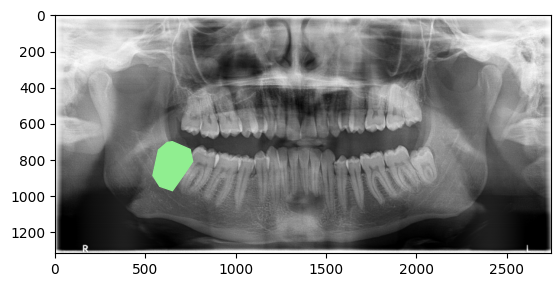

In [30]:
image_path = './dentex_dataset/origin/quadrant_enumeration_disease/xrays/train_673.png'
image = cv2.imread(image_path)

# Coordinates of the polygon
polygon_coords = annotations["segmentation"][1]

# Reshape the polygon coordinates into pairs of (x, y) points
points = np.array(polygon_coords).reshape(-1, 2)

# Fill the polygon with white color (255)
plt.fill(points[:, 0], points[:, 1], color='lightgreen')

# Display the segmentation overlaying on a blank image
plt.imshow(image)

## COCO
COCO is a broadly supported format to train AI models

In [36]:
with open("./dentex_dataset/coco/disease_all/annotations/instances_train2017.json", "r") as json_file:
    json_content = json.load(json_file)
    images = pd.DataFrame(json_content["images"]).set_index("id")
    annotations = pd.DataFrame(json_content["annotations"]).set_index("id")
    categories = pd.DataFrame(json_content["categories"]).set_index("id")

In [37]:
images

,height,width,file_name
id,,,
1,1316,2744,train_673.png
2,1504,2872,train_283.png
3,1316,2909,train_435.png
4,1504,2872,train_95.png
5,1504,2872,train_475.png
...,...,...,...
701,1316,2910,train_338.png
702,1316,2851,train_657.png
703,1316,2850,train_344.png


In [38]:
annotations

,iscrowd,image_id,bbox,segmentation,area,category_id
id,,,,,,
1,0,1,"[542.0, 698.0, 220.0, 271.0]","[[621, 703, 573, 744, 542, 885, 580, 945, 650,...",39683,0
2,0,1,"[1952.0, 693.0, 177.0, 270.0]","[[2045, 693, 2109, 734, 2129, 915, 2047, 963, ...",33301,0
3,0,1,"[675.0, 708.0, 243.0, 300.0]","[[784, 711, 754, 746, 737, 821, 678, 916, 675,...",45758,1
4,0,1,"[1463.0, 725.0, 98.0, 425.0]","[[1464, 749, 1513, 725, 1550, 760, 1555, 798, ...",30985,1
5,0,1,"[1536.0, 753.0, 103.0, 381.0]","[[1543, 796, 1590, 753, 1622, 796, 1629, 840, ...",28044,1
...,...,...,...,...,...,...
3525,0,705,"[1851.2857142857142, 474.2857142857142, 117.14...","[[1885, 477, 1868, 597, 1859, 657, 1851, 728, ...",28938,1
3526,0,705,"[1959.0, 479.9999999999999, 127.0, 274.2857142...","[[2005, 488, 1974, 479, 1965, 522, 1965, 588, ...",23181,1
3527,0,705,"[2024.9999999999998, 463.0, 147.00000000000023...","[[2064, 463, 2024, 471, 2036, 559, 2056, 628, ...",20023,3


In [39]:
categories

,name,supercategory
id,,
0,Impacted,Impacted
1,Caries,Caries
2,Periapical Lesion,Periapical Lesion
3,Deep Caries,Deep Caries


__Facit:__ The COCO dataset looks similar to the original, the only information which is missing is tooth and quarant number

## Segmentation Enumeration32

In [31]:
with open("./dentex_dataset/origin/quadrant_enumeration_disease/train_quadrant_enumeration_disease.json", "r") as json_file:
    json_content = json.load(json_file)
    images = pd.DataFrame(json_content['images']).set_index("id")

In [32]:
images

,height,width,file_name
id,,,
1,1316,2744,train_673.png
2,1504,2872,train_283.png
3,1316,2909,train_435.png
4,1504,2872,train_95.png
5,1504,2872,train_475.png
...,...,...,...
701,1316,2910,train_338.png
702,1316,2851,train_657.png
703,1316,2850,train_344.png


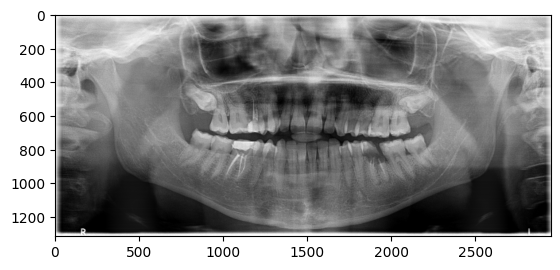

In [33]:
image_path = './dentex_dataset/segmentation/enumeration32/xrays/train_3.png'
image = cv2.imread(image_path)
plt.imshow(image)

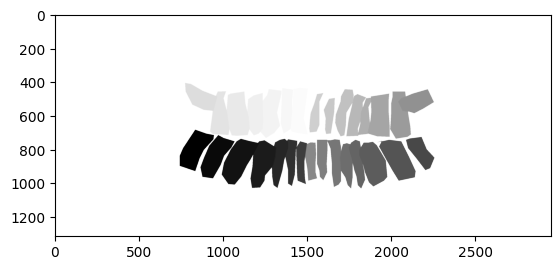

In [34]:
image_path = './dentex_dataset/segmentation/enumeration32/masks/train_3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='Greys')

__Facit:__ There is one mask file based on the training file containing all teeth colored by their quadrant